In [1]:
!pip install pandas
import pandas as pd
!pip install scikit-learn
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 21.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 25.2 MB/s eta 0:00:00


In [2]:
!pip install xlrd
!pip install openpyxl


In [3]:
df = pd.read_csv(
    '/Users/mitchellmarabella/Downloads/phytochemicals_full_features.xls',
)

df.shape

(58857, 2271)

In [4]:
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58857 entries, 0 to 58856
Columns: 2271 entries, CID to FP_2047
dtypes: float64(109), int64(2161), object(1)
memory usage: 1019.8+ MB


/Users/mitchellmarabella/Desktop/Current School/MBBE 447/.venv/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


LogP                   566
BCUT2D_MWHI            131
BCUT2D_MRHI            131
BCUT2D_LOGPHI          131
BCUT2D_CHGLO           131
BCUT2D_CHGHI           131
BCUT2D_MWLOW           131
BCUT2D_MRLOW           131
BCUT2D_LOGPLOW         131
MaxAbsPartialCharge      7
MaxPartialCharge         7
MinPartialCharge         7
MinAbsPartialCharge      7
SPS                      1
FP_1292                  0
FP_1306                  0
FP_1305                  0
FP_1304                  0
FP_1303                  0
FP_1302                  0
dtype: int64

In [5]:
null_percent = df.isnull().mean()
df = df.loc[:, null_percent < 0.5]


In [6]:
non_numeric = df.select_dtypes(include=['object']).columns.tolist()
print(non_numeric)


['SMILES']


In [7]:
print(df.columns.tolist())


['CID', 'SMILES', 'MolWt_x', 'LogP', 'HDonors', 'HAcceptors', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt_y', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR

In [8]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58857 entries, 0 to 58856
Columns: 2271 entries, CID to FP_2047
dtypes: float64(109), int64(2161), object(1)
memory usage: 1019.8+ MB


,CID,SMILES,MolWt_x,LogP,HDonors,HAcceptors,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,FP_2038,FP_2039,FP_2040,FP_2041,FP_2042,FP_2043,FP_2044,FP_2045,FP_2046,FP_2047
0,91456,CC1C2CC2(CC1=O)C(C)C,152.23,2.3,0,1,11.32456,11.32456,0.372593,0.372593,...,0,0,0,0,0,0,0,0,0,0
1,91456,CC1C2CC2(CC1=O)C(C)C,152.23,2.3,0,1,11.32456,11.32456,0.372593,0.372593,...,0,0,0,0,0,0,0,0,0,0
2,91456,CC1C2CC2(CC1=O)C(C)C,152.23,2.3,0,1,11.32456,11.32456,0.372593,0.372593,...,0,0,0,0,0,0,0,0,0,0
3,91456,CC1C2CC2(CC1=O)C(C)C,152.23,2.3,0,1,11.32456,11.32456,0.372593,0.372593,...,0,0,0,0,0,0,0,0,0,0
4,91456,CC1C2CC2(CC1=O)C(C)C,152.23,2.3,0,1,11.32456,11.32456,0.372593,0.372593,...,0,0,0,0,0,0,0,0,0,0


In [9]:

# Step 1: Identify toxicity target columns
tox_targets = [col for col in df.columns if col.startswith('NR-') or col.startswith('SR-')]
print(f"Toxicity targets found: {tox_targets}")

# Step 2: Drop rows with all toxicity targets missing
df = df.dropna(subset=tox_targets, how='all')
print(f"After dropping rows with all targets missing: {df.shape}")

# Step 3: Drop columns with >20% missing values (optional, depending on missingness)
df = df.dropna(axis=1, thresh=0.8 * len(df))
print(f"After dropping sparse columns: {df.shape}")

# Step 4: Define non-feature columns
non_feature_cols = ['CID', 'SMILES'] + tox_targets

# Step 5: Select feature columns
feature_cols = [col for col in df.columns if col not in non_feature_cols]

# Optional: fill missing values in features
df[feature_cols] = df[feature_cols].fillna(df[feature_cols].mean())

# Optional: fill missing labels with 0 (or use multilabel masking logic during training)
df[tox_targets] = df[tox_targets].fillna(0)

# Step 6: Prepare final feature matrix X and label matrix Y
X = df[feature_cols]
Y = df[tox_targets]

print(f"Final shape of feature matrix X: {X.shape}")
print(f"Final shape of label matrix Y: {Y.shape}")


Toxicity targets found: []
After dropping rows with all targets missing: (0, 2271)
After dropping sparse columns: (0, 2271)
Final shape of feature matrix X: (0, 2269)
Final shape of label matrix Y: (0, 0)


In [10]:
# List columns that look like label targets
possible_targets = [col for col in df.columns if df[col].nunique() <= 3 and df[col].dtype != 'object']
print(possible_targets)


['CID', 'MolWt_x', 'LogP', 'HDonors', 'HAcceptors', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt_y', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'S

# Model Creation using tox21 dataset

In [11]:
# load the tox21 dataset

!pip install rdkit
from rdkit import Chem
from rdkit.Chem import PandasTools

# Load the SDF file
sdf_file = "tox21_10k_data_all.sdf"
suppl = Chem.SDMolSupplier(sdf_file)

# Filter out None values (invalid molecules)
mols = [mol for mol in suppl if mol is not None]

# Convert to pandas DataFrame with molecule objects
df_tox21 = PandasTools.LoadSDF(sdf_file, removeHs=False)
df_tox21 = df_tox21[df_tox21.ROMol.notnull()]  # Drop rows with invalid molecules

# Peek at the data
df_tox21.head()


[15:07:31] The 2 defining bonds for an atropisomer are co-planar - atoms are: 4 10
[15:07:31] Explicit valence for atom # 3 Cl, 1, is greater than permitted
[15:07:31] ERROR: Could not sanitize molecule ending on line 21572
[15:07:31] ERROR: Explicit valence for atom # 3 Cl, 1, is greater than permitted
[15:07:31] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 1 ignored.
[15:07:31] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 1 ignored.
[15:07:31] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 6 ignored.
[15:07:31] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 6 ignored.
[15:07:31] The 2 defining bonds for an atropisomer are co-planar - atoms are: 4 10
[15:07:32] Explicit valence for atom # 3 Cl, 1, is greater than permitted
[15:07:32] ERROR: Could not sanitize molecule ending on line 446665
[15:07:32] ERROR: Explicit valence for atom # 

,Formula,FW,DSSTox_CID,SR-HSE,ID,ROMol,NR-AR,SR-ARE,NR-Aromatase,NR-ER-LBD,NR-AhR,SR-MMP,NR-ER,NR-PPAR-gamma,SR-p53,SR-ATAD5,NR-AR-LBD
0,C27H25ClN6,468.9806 (35.4535+224.2805+209.2465),25848,0,NCGC00178831-03,<rdkit.Chem.rdchem.Mol object at 0x159bad070>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C20H6Br4Na2O5,691.8542 (645.8757+22.9892+22.9892),5234,0,NCGC00166114-03,<rdkit.Chem.rdchem.Mol object at 0x322461460>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C47H83NO17,934.1584 (916.1205+18.0379),28909,0,NCGC00263563-01,<rdkit.Chem.rdchem.Mol object at 0x3224614d0>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C52H54N4O12,927.0048 (329.4575+89.0275+89.0275+329.4575+90...,5513,1,NCGC00013058-02,<rdkit.Chem.rdchem.Mol object at 0x322461540>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C66H87N17O14,1342.5025 (1282.4505+60.0520),26683,NaN,NCGC00167516-01,<rdkit.Chem.rdchem.Mol object at 0x3224615b0>,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from rdkit.ML.Descriptors import MoleculeDescriptors
import numpy as np

# Get list of all RDKit descriptor names
descriptor_names = [desc[0] for desc in Descriptors._descList]
calc = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

def compute_descriptors_and_fingerprint(mol):
    if mol is None:
        return None
    try:
        # Compute molecular descriptors
        descriptors = list(calc.CalcDescriptors(mol))
        
        # Compute Morgan fingerprint
        fp = GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fp_array = np.array(fp)
        
        return descriptors + fp_array.tolist()
    except Exception as e:
        print(f"Error processing molecule: {e}")
        return None


In [13]:
import pandas as pd
from rdkit import Chem

# Load the molecules from SDF
suppl = Chem.SDMolSupplier('tox21_10k_data_all.sdf')
mols = [mol for mol in suppl if mol is not None]

# Initialize lists
features = []
labels = []

# Choose target (example: 'SR-MMP'; you can replace this with another Tox21 target like 'NR-AR', etc.)
target = 'SR-MMP'

# Extract features and labels
for mol in mols:
    feature_vector = compute_descriptors_and_fingerprint(mol)
    if feature_vector is None:
        continue
    try:
        label = mol.GetProp(target)
        if label == "":
            continue
        features.append(feature_vector)
        labels.append(int(label))
    except:
        continue

# Create feature matrix and label vector
X = pd.DataFrame(features)
y = pd.Series(labels, name=target)

print(f"✅ Feature matrix shape: {X.shape}")
print(f"✅ Label vector shape: {y.shape}")


[15:07:42] The 2 defining bonds for an atropisomer are co-planar - atoms are: 4 10
[15:07:42] Explicit valence for atom # 3 Cl, 1, is greater than permitted
[15:07:42] ERROR: Could not sanitize molecule ending on line 21572
[15:07:42] ERROR: Explicit valence for atom # 3 Cl, 1, is greater than permitted
[15:07:42] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 1 ignored.
[15:07:42] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 1 ignored.
[15:07:42] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 6 ignored.
[15:07:42] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 6 ignored.
[15:07:42] The 2 defining bonds for an atropisomer are co-planar - atoms are: 4 10
[15:07:43] Explicit valence for atom # 3 Cl, 1, is greater than permitted
[15:07:43] ERROR: Could not sanitize molecule ending on line 446665
[15:07:43] ERROR: Explicit valence for atom # 

✅ Feature matrix shape: (7319, 2265)
✅ Label vector shape: (7319,)


In [24]:
# Get descriptor and fingerprint column names
from rdkit.Chem import Descriptors

descriptor_names = [desc[0] for desc in Descriptors._descList]
fp_cols = [f"FP_{i}" for i in range(2048)]  # 2048 if using Morgan fingerprints
all_cols = descriptor_names + fp_cols

# Re-assign to X if needed
X.columns = all_cols

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2255,2256,2257,2258,2259,2260,2261,2262,2263,2264
0,13.446839,13.446839,0.025204,-4.587558,0.323460,16.444444,523.973,496.757,523.170133,192,...,0,0,0,0,0,0,0,0,0,0
1,9.553611,9.553611,0.557870,-1.257037,0.552422,24.678571,393.568,354.256,393.287909,160,...,0,0,0,0,0,0,0,0,0,0
2,2.361836,2.361836,0.000000,0.000000,0.382270,11.260870,339.995,301.691,339.269278,134,...,0,0,0,0,0,0,0,0,0,0
3,10.568199,10.568199,0.128494,-0.269721,0.617691,12.160000,330.471,304.263,330.198365,128,...,0,0,0,0,0,0,0,0,0,0
4,2.365434,2.365434,0.000000,-0.696606,0.065697,11.647059,563.774,495.230,562.424201,208,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.model_selection import GridSearchCV

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

In [25]:
# do the train test split (75% of data for training)
X_train, X_test, y_train, y_test = train_test_split(X, y) 

# train RFC 
clf=RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# testing hyperparameteres for RFC
param_grid ={
    'max_samples': [0.25, 0.5, 0.75, 1],
    'max_features': [0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 100, 200, 1000],
    'max_depth': [4, 8, 10]
}
grid_search = GridSearchCV(clf, param_grid, cv=5, return_train_score=True) 
grid_search.fit(X_train, y_train)

optimal_params = grid_search.best_params_

0.9158469945355191

In [29]:
optimal_clf = RandomForestClassifier(**optimal_params)

optimal_clf.fit(X_train, y_train)

best_y_pred = optimal_clf.predict(X_test) 
final_accuracy = accuracy_score(y_test, best_y_pred) 
final_accuracy

0.9103825136612022

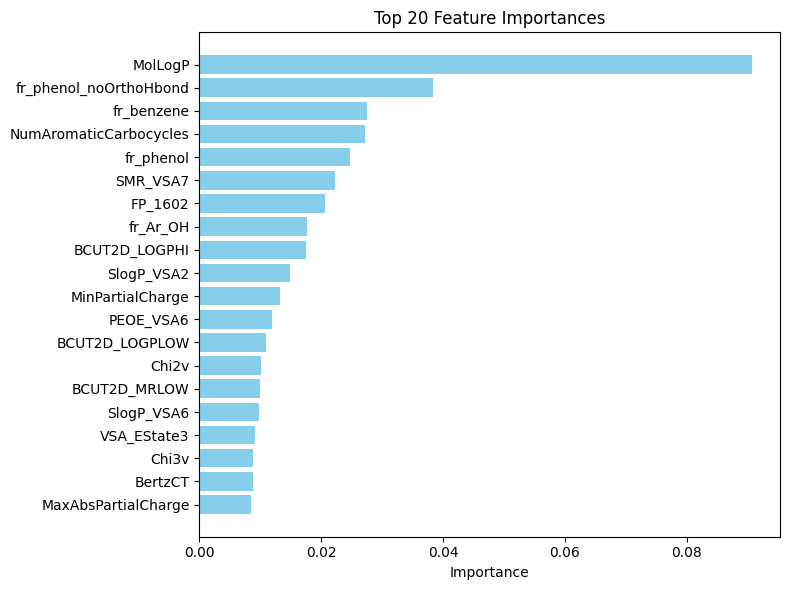

In [28]:
import matplotlib.pyplot as plt

# Get top N important features
top_n = 20
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(8, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [33]:
# Load your phytochemical dataset
df_phyto = pd.read_csv("/Users/mitchellmarabella/Downloads/phytochemicals_full_features.xls")
print(df_phyto.shape)
df_phyto.head()

(58857, 2271)


,CID,SMILES,MolWt_x,LogP,HDonors,HAcceptors,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,FP_2038,FP_2039,FP_2040,FP_2041,FP_2042,FP_2043,FP_2044,FP_2045,FP_2046,FP_2047
0,91456,CC1C2CC2(CC1=O)C(C)C,152.23,2.3,0,1,11.32456,11.32456,0.372593,0.372593,...,0,0,0,0,0,0,0,0,0,0
1,91456,CC1C2CC2(CC1=O)C(C)C,152.23,2.3,0,1,11.32456,11.32456,0.372593,0.372593,...,0,0,0,0,0,0,0,0,0,0
2,91456,CC1C2CC2(CC1=O)C(C)C,152.23,2.3,0,1,11.32456,11.32456,0.372593,0.372593,...,0,0,0,0,0,0,0,0,0,0
3,91456,CC1C2CC2(CC1=O)C(C)C,152.23,2.3,0,1,11.32456,11.32456,0.372593,0.372593,...,0,0,0,0,0,0,0,0,0,0
4,91456,CC1C2CC2(CC1=O)C(C)C,152.23,2.3,0,1,11.32456,11.32456,0.372593,0.372593,...,0,0,0,0,0,0,0,0,0,0


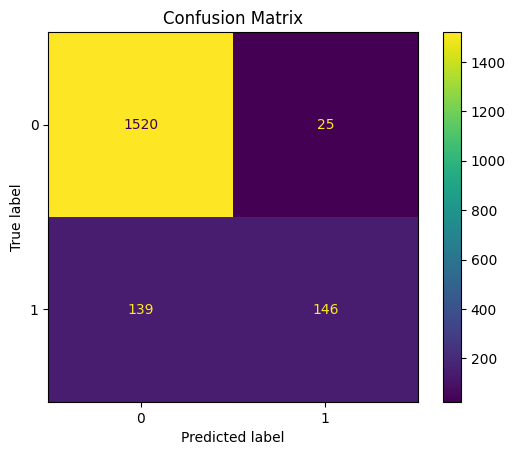

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = optimal_clf.predict(X_test)
cm = confusion_matrix(y_test, best_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [43]:
from sklearn.metrics import classification_report
report = classification_report(y_test, best_y_pred, labels=['Yes', 'No'])

print(report)

              precision    recall  f1-score   support

         Yes       0.00      0.00      0.00         0
          No       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0



/Users/mitchellmarabella/Desktop/Current School/MBBE 447/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mitchellmarabella/Desktop/Current School/MBBE 447/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mitchellmarabella/Desktop/Current School/MBBE 447/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` par

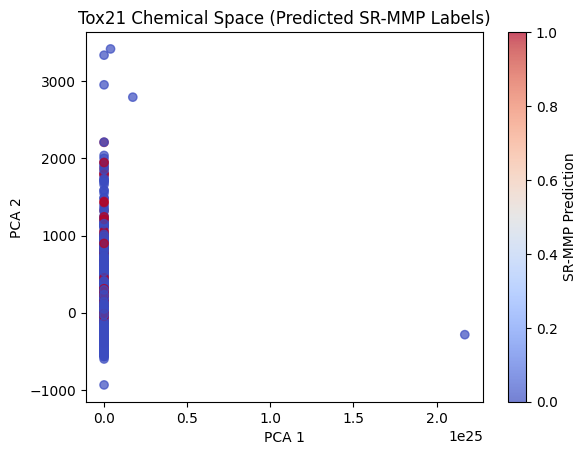

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA on the same feature set used for prediction
X_reduced = PCA(n_components=2).fit_transform(X_test)

# Plot using best_y_pred, which should match X_valid.shape[0]
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=best_y_pred, cmap='coolwarm', alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Tox21 Chemical Space (Predicted SR-MMP Labels)")
plt.colorbar(label='SR-MMP Prediction')
plt.show()


# Phytochemical Dataset Application

In [ ]:
# extract molecular discriptors and fingerprints
from rdkit.Chem import Descriptors 
from rdkit.ML.Descriptors import MoleculeDescriptors 
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect 

In [34]:
# Get the feature names used during training
model_features = X.columns.tolist()  # X is from the Tox21 training process

# Make sure all required features exist in the phytochemical dataset
missing = [feat for feat in model_features if feat not in df_phyto.columns]
print(f"Missing features: {missing}")


Missing features: ['MolWt']


In [50]:
[col for col in df_phyto.columns if 'MolWt' in col]

['MolWt_x', 'MolWt_y', 'HeavyAtomMolWt', 'ExactMolWt']

In [51]:
df_phyto['MolWt'] = df_phyto['MolWt_x']

X_phyto = df_phyto[model_features]
X_phyto = X_phyto.fillna(X_phyto.mean())


In [54]:
import numpy as np

# Step 1: Replace any infinite values with NaN
X_phyto = X_phyto.replace([np.inf, -np.inf], np.nan)

# Step 2: Fill all NaNs with column means (or zeros if preferred)
X_phyto = X_phyto.fillna(X_phyto.mean())

# Step 3: Optional — clip any extreme values to a safe range
X_phyto = X_phyto.clip(lower=-1e6, upper=1e6)


In [55]:


# Predict probability of SR-MMP activity
y_phyto_proba = optimal_clf.predict_proba(X_phyto)[:, 1]

# Predict binary SR-MMP label (optional, e.g., 1 = toxic, 0 = non-toxic)
y_phyto_pred = optimal_clf.predict(X_phyto)

# Add results back to your dataframe
df_phyto['SR-MMP_Probability'] = y_phyto_proba
df_phyto['SR-MMP_Predicted'] = y_phyto_pred

## Analyzing Tox21 model applied to Phytochemicals

In [60]:
[col for col in df_phyto.columns if 'Chem' in col]

[]

In [64]:
top_toxic = df_phyto.sort_values(by='SR-MMP_Probability', ascending=False).head(10)
top_toxic[['CID', 'SR-MMP_Probability', 'SR-MMP_Predicted']]

,CID,SR-MMP_Probability,SR-MMP_Predicted
37948,448537,0.985819,1
35527,445154,0.983109,1
35518,1548910,0.983109,1
35520,1548910,0.983109,1
35521,1548910,0.983109,1
35522,1548910,0.983109,1
35523,1548910,0.983109,1
35524,445154,0.983109,1
35525,445154,0.983109,1
35526,445154,0.983109,1


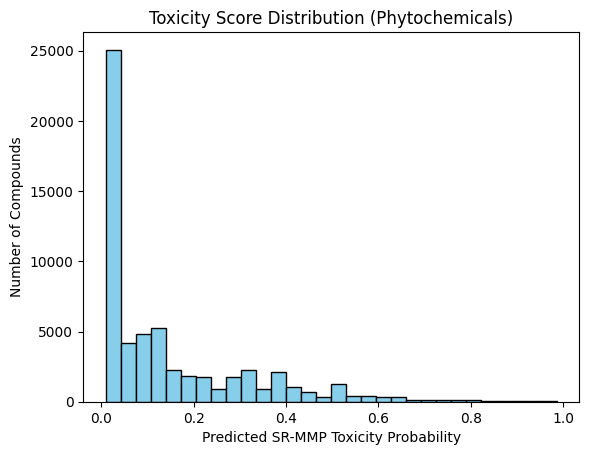

In [57]:
import matplotlib.pyplot as plt

plt.hist(df_phyto['SR-MMP_Probability'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Predicted SR-MMP Toxicity Probability")
plt.ylabel("Number of Compounds")
plt.title("Toxicity Score Distribution (Phytochemicals)")
plt.show()


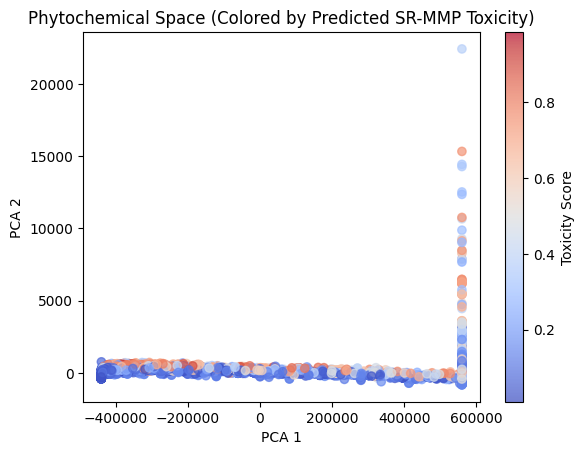

In [61]:
from sklearn.decomposition import PCA

X_plot = X_phyto.copy()  # already cleaned
X_pca = PCA(n_components=2).fit_transform(X_plot)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_phyto['SR-MMP_Probability'], cmap='coolwarm', alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Phytochemical Space (Colored by Predicted SR-MMP Toxicity)")
plt.colorbar(label="Toxicity Score")
plt.show()

In [62]:
df_phyto['SR-MMP_Predicted'].value_counts(normalize=True).map("{:.2%}".format)


SR-MMP_Predicted
0    93.95%
1     6.05%
Name: proportion, dtype: object

^^^ Above shows that 6.05% are toxic 

In [65]:
# Filter for toxic compounds
toxic_compounds = df_phyto[df_phyto['SR-MMP_Predicted'] == 1]

# Display just CIDs
toxic_cids = toxic_compounds['CID']

# OR display a preview
toxic_compounds[['CID', 'SR-MMP_Probability']].head(10)


,CID,SR-MMP_Probability
289,196402,0.621341
533,9064,0.508496
534,9064,0.508496
535,9064,0.508496
536,9064,0.508496
537,9064,0.508496
538,9064,0.508496
539,9064,0.508496
540,9064,0.508496
541,9064,0.508496


In [67]:
!pip install requests
!pip install time
import requests
import time

def get_compound_name(cid):
    try:
        url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/IUPACName/JSON"
        r = requests.get(url)
        r.raise_for_status()
        name = r.json()['PropertyTable']['Properties'][0]['IUPACName']
        return name
    except:
        return None

# Example: run on your predicted toxic CIDs
toxic_cids = df_phyto[df_phyto['SR-MMP_Predicted'] == 1]['CID'].unique()
cid_name_map = {}

for i, cid in enumerate(toxic_cids):
    name = get_compound_name(cid)
    cid_name_map[cid] = name
    if i % 10 == 0:
        time.sleep(1)  # be nice to the API

# Convert to DataFrame
import pandas as pd
cid_names_df = pd.DataFrame(list(cid_name_map.items()), columns=["CID", "IUPAC_Name"])

# Save or display
cid_names_df.to_csv("toxic_cids_with_names.csv", index=False)
cid_names_df.head()

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


,CID,IUPAC_Name
0,196402,"(2R,3R,10R,11R,18S,19S)-3,11,19-tris(4-hydroxy..."
1,9064,"(2R,3S)-2-(3,4-dihydroxyphenyl)-3,4-dihydro-2H..."
2,182232,"(2S,3S)-2-(3,4-dihydroxyphenyl)-3,4-dihydro-2H..."
3,72276,"(2R,3R)-2-(3,4-dihydroxyphenyl)-3,4-dihydro-2H..."
4,1203,"2-(3,4-dihydroxyphenyl)-3,4-dihydro-2H-chromen..."


In [ ]:
cid_names_df

toxic_compounds

,CID,IUPAC_Name
0,196402,"(2R,3R,10R,11R,18S,19S)-3,11,19-tris(4-hydroxy..."
1,9064,"(2R,3S)-2-(3,4-dihydroxyphenyl)-3,4-dihydro-2H..."
2,182232,"(2S,3S)-2-(3,4-dihydroxyphenyl)-3,4-dihydro-2H..."
3,72276,"(2R,3R)-2-(3,4-dihydroxyphenyl)-3,4-dihydro-2H..."
4,1203,"2-(3,4-dihydroxyphenyl)-3,4-dihydro-2H-chromen..."
...,...,...
1305,6064803,"5,8-dihydroxy-2,2-dimethylpyrano[3,2-b]xanthen..."
1306,95168,"5-hydroxy-3-(4-hydroxyphenyl)-8,8-dimethyl-6-(..."
1307,13808,"2-butanoyl-4-[(3-butanoyl-2,4-dihydroxy-6-meth..."
1308,31161,"2-(3,4-dihydroxyphenyl)-5,6-dihydroxy-7-methox..."


In [72]:
# Merge toxic CIDs and names with full prediction results
merged_df = pd.merge(
    df_phyto[['CID', 'SR-MMP_Probability', 'SR-MMP_Predicted']],
    cid_names_df,
    on='CID',
    how='inner'  # only include rows that matched
)

# Optional: reorder or filter
merged_df = merged_df[['CID', 'IUPAC_Name', 'SR-MMP_Probability', 'SR-MMP_Predicted']]

# Preview
merged_df.head()

,CID,IUPAC_Name,SR-MMP_Probability,SR-MMP_Predicted
0,196402,"(2R,3R,10R,11R,18S,19S)-3,11,19-tris(4-hydroxy...",0.621341,1
1,9064,"(2R,3S)-2-(3,4-dihydroxyphenyl)-3,4-dihydro-2H...",0.508496,1
2,9064,"(2R,3S)-2-(3,4-dihydroxyphenyl)-3,4-dihydro-2H...",0.508496,1
3,9064,"(2R,3S)-2-(3,4-dihydroxyphenyl)-3,4-dihydro-2H...",0.508496,1
4,9064,"(2R,3S)-2-(3,4-dihydroxyphenyl)-3,4-dihydro-2H...",0.508496,1


In [73]:
merged_df.to_csv("toxic_phytochemicals_with_names.csv", index=False)